In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
def scaling(data):
    data = (data - data.min())/(data.max()-data.min())
    return data

In [3]:
def linear_regression(X,Y,LR,epochs):
    m = len(X)
    w = np.zeros(X.shape[1])
    b = 0
    costfunction = []
    for i in range(epochs):
        y_hat = np.dot(w, X.T) + b
        error =y_hat - Y
        costfn = np.sum((error**2)/(2*m))
        w_gradient =np.dot(X.T, error)/m        
        b_gradient = np.sum(error/m) 
        w = w - LR*w_gradient
        b = b - LR*b_gradient
        costfunction.append(costfn)

        if i%100 == 0:
            print(f"costfunction at {i}:",round(costfn,5))
    
    plt.plot(range(epochs),costfunction)
    plt.xlabel('Iterations')
    plt.ylabel('Cost Function')
    plt.show()
    
    return w,b,costfn


In [4]:
def check_accuracy(w, b, X, Y):
    erroravg = 0
    m = len(X)
    for i, row in X.iterrows():
        y_hat = np.dot(w, row) + b
        erroravg += np.absolute(round(y_hat - Y[i], 5))
    avg_error = erroravg * 100 / m
    accuracy = 100 - avg_error
    return avg_error, accuracy,y_hat

In [5]:
def R2SCORE(w,b,X,y):
    y_hat = np.dot(X, w) + b
    score = r2_score(y,y_hat)
    return round(score,2)*100


In [6]:
def remove_outliers_zscore(data, columns, threshold=5):
    z_scores = np.abs((data[columns] - data[columns].mean()) / data[columns].std())
    data_no_outliers = data[(z_scores < threshold).all(axis=1)]
    return data_no_outliers

costfunction at 0: 0.04384
costfunction at 100: 0.01321
costfunction at 200: 0.01003
costfunction at 300: 0.00844
costfunction at 400: 0.00756
costfunction at 500: 0.00704
costfunction at 600: 0.00671
costfunction at 700: 0.00649
costfunction at 800: 0.00634
costfunction at 900: 0.00622


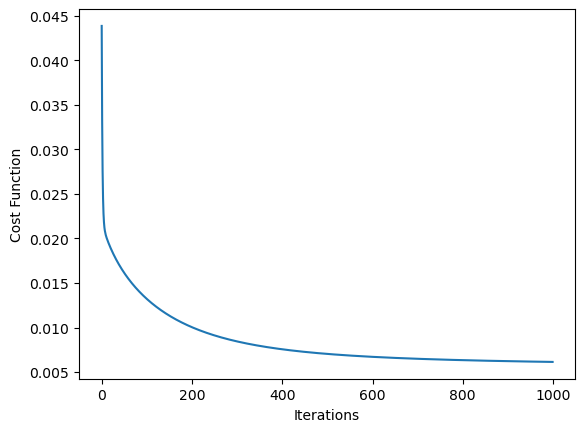

R2 for training data:74.0
R2 for testing data:69.0
train error: 7.961594019607875 || train accuracy: 92.03840598039213
test error: 8.769068333333328 || test accuracy: 91.23093166666668


In [7]:
data = pd.read_csv("rugvedlin.csv")
columns_to_check = ['table', 'depth']
data= remove_outliers_zscore(data, columns_to_check)
data = pd.read_csv("rugvedlin.csv")
data = pd.get_dummies(data).astype(int)


train_data, test_data = train_test_split(data, test_size=0.15, random_state=7)


Y_train = train_data["price"]
X_train = train_data.drop(["price"], axis=1)
X_train = scaling(X_train)
Y_train = scaling(Y_train)


Y_test = test_data["price"]
X_test = test_data.drop(["price"], axis=1)
X_test = scaling(X_test)
Y_test = scaling(Y_test)


w, b, costfn= linear_regression(X_train, Y_train, LR=0.1, epochs=1000)


trainerror, trainaccuracy,y_hat_train = check_accuracy(w, b, X_train, Y_train)
testerror, testaccuracy,y_hat_test = check_accuracy(w, b, X_test, Y_test)
r2train = R2SCORE(w,b,X_train,Y_train)
r2test = R2SCORE(w,b,X_test,Y_test)

print(f"R2 for training data:{r2train}")
print(f"R2 for testing data:{r2test}")
print(f"train error: {trainerror} || train accuracy: {trainaccuracy}")
print(f"test error: {testerror} || test accuracy: {testaccuracy}")